# 放物運動の数値計算  

一定重力加速度の下での放物運動の式は高校物理で学びます。  

x軸（水平）方向について  
　　$a_x(t) = 0$  
　　$v_x(t) = v_{x0}$  
　　$x(t) = v_{x0}\cdot t$　 

y軸（鉛直）方向について  
　　$a_y(t) = -g$  
　　$v_y(t) = v_{y0} -g\cdot t$  
　　$y(t) = v_{y0}\cdot t - \frac{1}{2}g\cdot t^2$　  

上記の「$\cdot$」は視認性をあげるために使ってるだけです。  
解析的に解けるので、数値計算する必要は無いのですが、例としてやってみました。  
下記に、Juliaを用いてオイラー法とリープフロッグ法で計算した結果を示します。  
ついでに、力学的エネルギーは保存するかどうかについても示します。

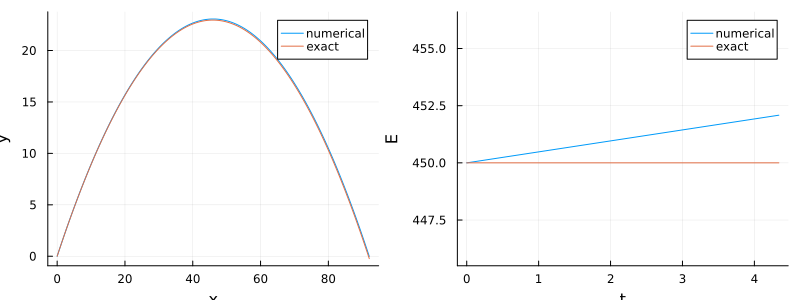

In [1]:
#-------------------------------
#   放物運動の数値計算：オイラー法
#-------------------------------

using Plots

#各種パラメータの設定
m = 1 #質量
g = 9.8 #重力加速度
v0 = 30.0 #初速度
θ = 45.0 #仰角
dt = 0.01 #計算する時間刻み。細かいほど精度は出るが計算時間はかかる。

#初期条件
t = [0.0]
x = [0.0]
y = [0.0]
vx = [v0*cosd(θ)]
vy = [v0*sind(θ)]

#オイラー法で計算
while y[end] >= 0
    
    addx = x[end] + vx[end]*dt
    addy = y[end] + vy[end]*dt
    addvx = vx[end];
    addvy = vy[end] - g*dt
    adddt = t[end] + dt
    
    push!(x, addx)
    push!(y, addy)
    push!(vx, addvx)
    push!(vy, addvy)
    push!(t, adddt)

end

#厳密解
xe = v0*cosd(θ)*t
ye = v0*sind(θ)*t - 0.5*g*t.^2
vxe = t*0 .+ v0*cosd(θ)
vye = t*0 .+ v0*sind(θ) - g*t

#力学的エネルギーの計算
Eeu = 0.5*m*(vx.^2+vy.^2) + m*g*y
Eex = 0.5*m*(vxe.^2+vye.^2) + m*g*ye

#プロット
p1 = plot([x xe], [y ye], label = ["numerical" "exact"], xlabel = "x", ylabel = "y")
p2 = plot([t t], [Eeu Eex], label = ["numerical" "exact"], xlabel = "t", ylabel = "E", ylims=(minimum(Eeu)*0.99, maximum(Eeu)*1.01))
plot(p1,p2,layout=(1,2),size=(800,300))

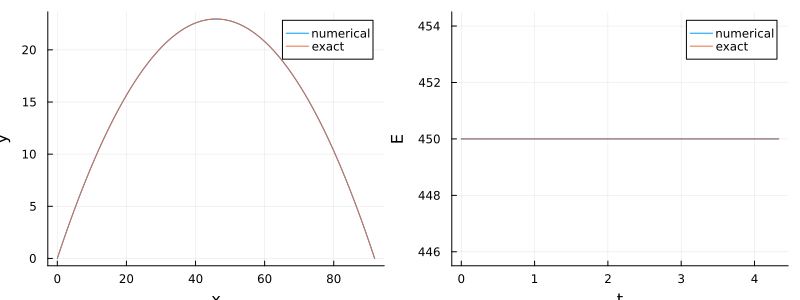

In [2]:
#----------------------------------------
#   放物運動の数値計算：リープフロッグ法
#----------------------------------------

using Plots
gr()

#各種パラメータの設定
m = 1
g = 9.8
v0 = 30.0
θ = 45.0
dt = 0.01

#初期条件
t = [0.0]
x = [0.0]
y = [0.0]
vx = [v0*cosd(θ)]
vy = [v0*sind(θ)]

#最初だけ、オイラー法で計算
addx = x[1] + vx[1]*dt
addy = y[1] + vy[1]*dt
addvx = vx[1]
addvy = vy[1] - g*dt
adddt = t[1] + dt

push!(x, addx)
push!(y, addy)
push!(vx, addvx)
push!(vy, addvy)
push!(t, adddt)

#リープフロッグ法で計算
iii = 3
while y[iii-1] >= 0
    
    addx = x[iii-2] + 2*vx[iii-1]*dt
    addy = y[iii-2] + 2*vy[iii-1]*dt
    addvx = vx[iii-1]
    addvy = vy[iii-1] - g*dt
    adddt = t[iii-1] + dt
    
    push!(x, addx)
    push!(y, addy)
    push!(vx, addvx)
    push!(vy, addvy)
    push!(t, adddt)

    iii = iii + 1

end

#厳密解
xe = v0*cosd(θ)*t
ye = v0*sind(θ)*t - 0.5*g*t.^2
vxe = t*0 .+ v0*cosd(θ)
vye = t*0 .+ v0*sind(θ) - g*t

#力学的エネルギーの計算
Elf = 0.5*m*(vx.^2+vy.^2) + m*g*y
Eex = 0.5*m*(vxe.^2+vye.^2) + m*g*ye

#プロット
p1 = plot([x xe], [y ye], label = ["numerical" "exact"], xlabel = "x", ylabel = "y")
p2 = plot([t t], [Elf Eex], label = ["numerical" "exact"], xlabel = "t", ylabel = "E", ylims=(maximum(Elf)*0.99, maximum(Elf)*1.01))
plot(p1,p2,layout=(1,2),size=(800,300))